In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

case_to_evaluate="9_3_2"
case_percentage = "0_2"
case_normalization = "S"

# Load data


In [409]:
combined_imputed_cells = pd.read_csv(f"data/{case_to_evaluate}/distance_based/{case_percentage}/{case_normalization}/combined_imputed_cells.csv")
combined_replaced_cells = pd.read_csv(f"data/{case_to_evaluate}/distance_based/{case_percentage}/{case_normalization}/combined_replaced_cells.csv")
combined_test_cells = pd.read_csv(f"data/{case_to_evaluate}/distance_based/{case_percentage}/{case_normalization}/combined_test_cells.csv")
combined_train_cells = pd.read_csv(f"data/{case_to_evaluate}/distance_based/{case_percentage}/{case_normalization}/combined_train_cells.csv")
combined_un_normalized_cells = pd.read_csv(f"data/{case_to_evaluate}/distance_based/{case_percentage}/{case_normalization}/combined_un_normalized_test_cells.csv")
combined_test_cells.columns

Index(['Mean Neighbor Intensity pERK', 'Mean Neighbor Intensity Rad51',
       'Mean Neighbor Intensity CCND1', 'Mean Neighbor Intensity Vimentin',
       'Mean Neighbor Intensity aSMA', 'Mean Neighbor Intensity Ecad',
       'Mean Neighbor Intensity ER', 'Mean Neighbor Intensity PR',
       'Mean Neighbor Intensity EGFR', 'Mean Neighbor Intensity pRB',
       'Mean Neighbor Intensity CD45', 'Mean Neighbor Intensity Ki67',
       'Mean Neighbor Intensity CK19', 'Mean Neighbor Intensity p21',
       'Mean Neighbor Intensity CK14', 'Mean Neighbor Intensity AR',
       'Mean Neighbor Intensity cPARP', 'Mean Neighbor Intensity CK17',
       'Mean Neighbor Intensity CK7', 'Mean Neighbor Intensity HER2', 'pERK',
       'Rad51', 'CCND1', 'Vimentin', 'aSMA', 'Ecad', 'ER', 'PR', 'EGFR', 'pRB',
       'CD45', 'Ki67', 'CK19', 'p21', 'CK14', 'AR', 'cPARP', 'CK17', 'CK7',
       'HER2', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Solidity',
       'Extent', 'Eccentricity', 'X_centroid', 'Y_centr

## Normalization

### Mean

In [410]:
test_mean_subset = pd.DataFrame(combined_test_cells.loc[:, combined_test_cells.columns != 'Radius'].copy().mean())
train_mean_subset = pd.DataFrame(combined_train_cells.loc[:, combined_train_cells.columns != 'Radius'].copy().mean())

train_mean_subset.reset_index(inplace=True)
train_mean_subset.rename(columns={0: "Mean", "index": "Feature"}, inplace=True)

test_mean_subset.reset_index(inplace=True)
test_mean_subset.rename(columns={0: "Mean", "index": "Feature"}, inplace=True)

test_mean_subset.to_csv(f"data/{case_to_evaluate}/distance_based/{case_percentage}/{case_normalization}/test_cells_normalized_mean.csv", index=False)
train_mean_subset.to_csv(f"data/{case_to_evaluate}/distance_based/{case_percentage}/{case_normalization}/train_cells_normalized_mean.csv", index=False)

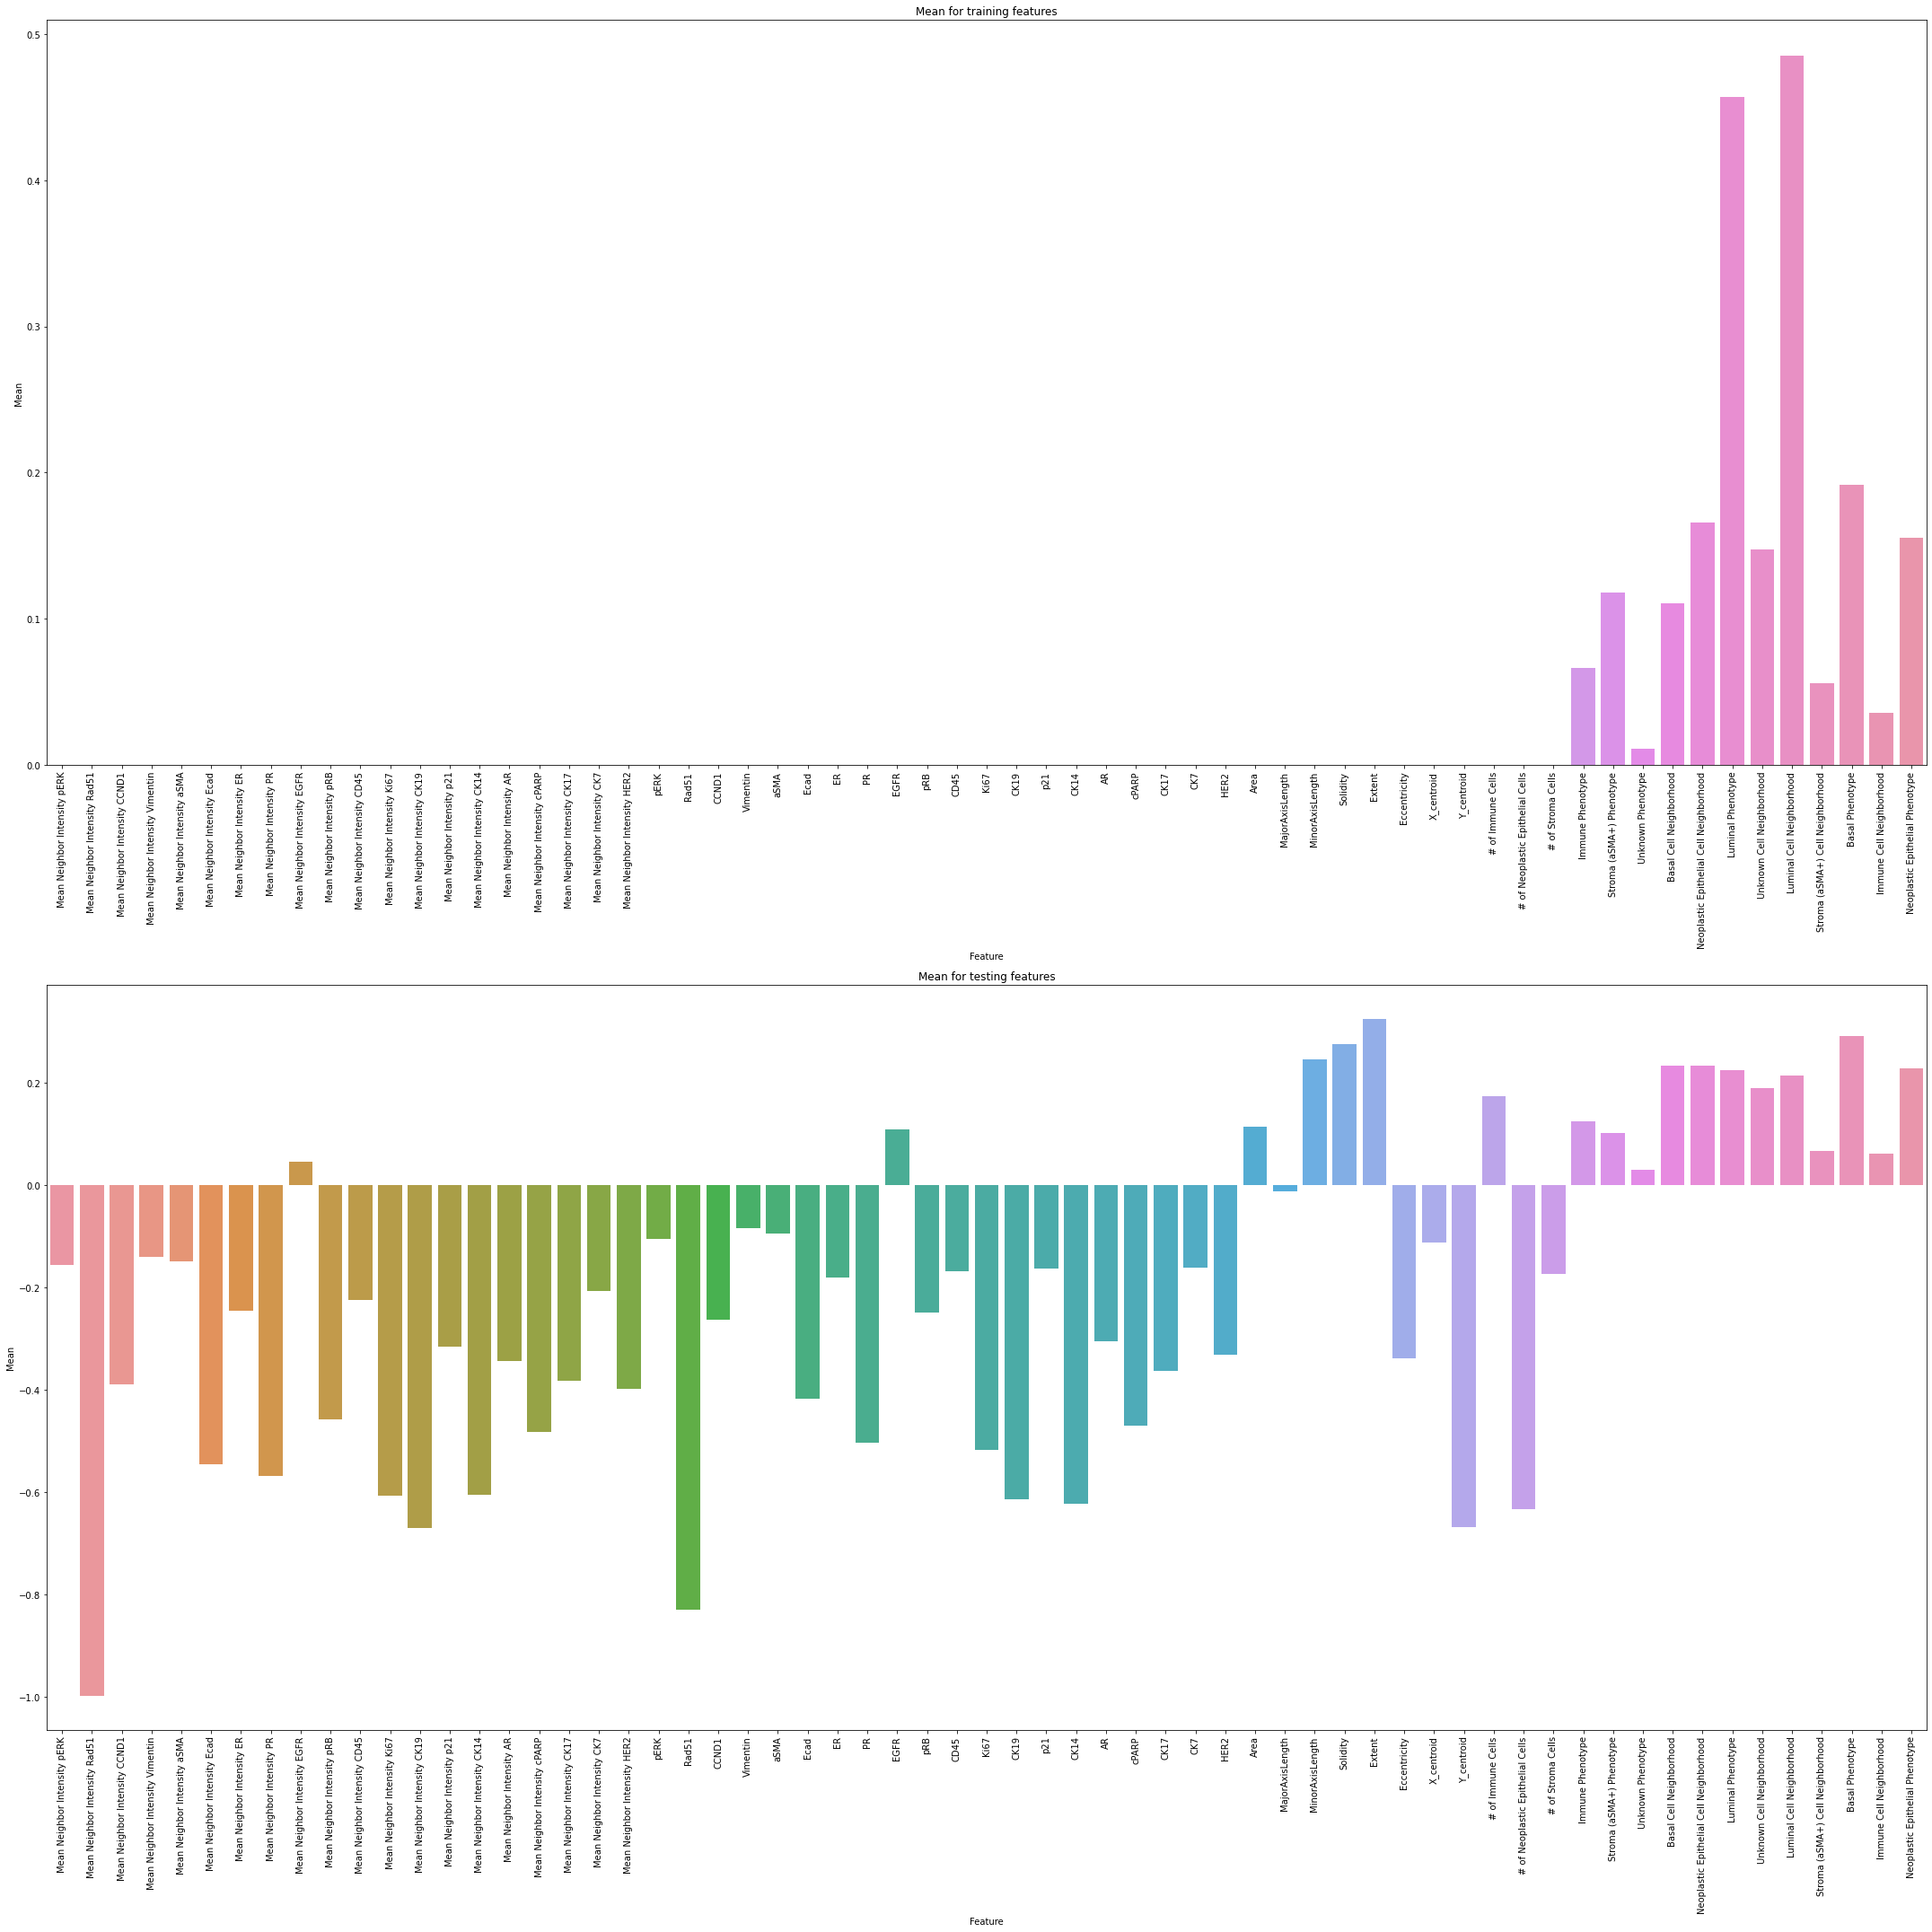

In [411]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(30, 30))
sns.barplot(x="Feature", y="Mean", data=train_mean_subset, ax=ax1)
sns.barplot(x="Feature", y="Mean", data=test_mean_subset, ax=ax2)
for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
        
ax1.set_title("Mean for training features")
ax2.set_title("Mean for testing features")
        
        
plt.tight_layout()
plt.savefig(f'data/{case_to_evaluate}/distance_based/{case_percentage}/{case_normalization}/mean.png', dpi=fig.dpi,bbox_inches='tight',facecolor='w')

### Variance

In [412]:
test_var_subset = pd.DataFrame(combined_test_cells.loc[:, combined_test_cells.columns != 'Radius'].copy().var())
train_var_subset = pd.DataFrame(combined_train_cells.loc[:, combined_train_cells.columns != 'Radius'].copy().var())

train_var_subset.reset_index(inplace=True)
train_var_subset.rename(columns={0: "Variance", "index": "Feature"}, inplace=True)

test_var_subset.reset_index(inplace=True)
test_var_subset.rename(columns={0: "Variance", "index": "Feature"}, inplace=True)


test_var_subset.to_csv(f"data/{case_to_evaluate}/distance_based/{case_percentage}/{case_normalization}/test_cells_normalized_var.csv", index=False)
train_var_subset.to_csv(f"data/{case_to_evaluate}/distance_based/{case_percentage}/{case_normalization}/train_cells_normalized_var.csv", index=False)

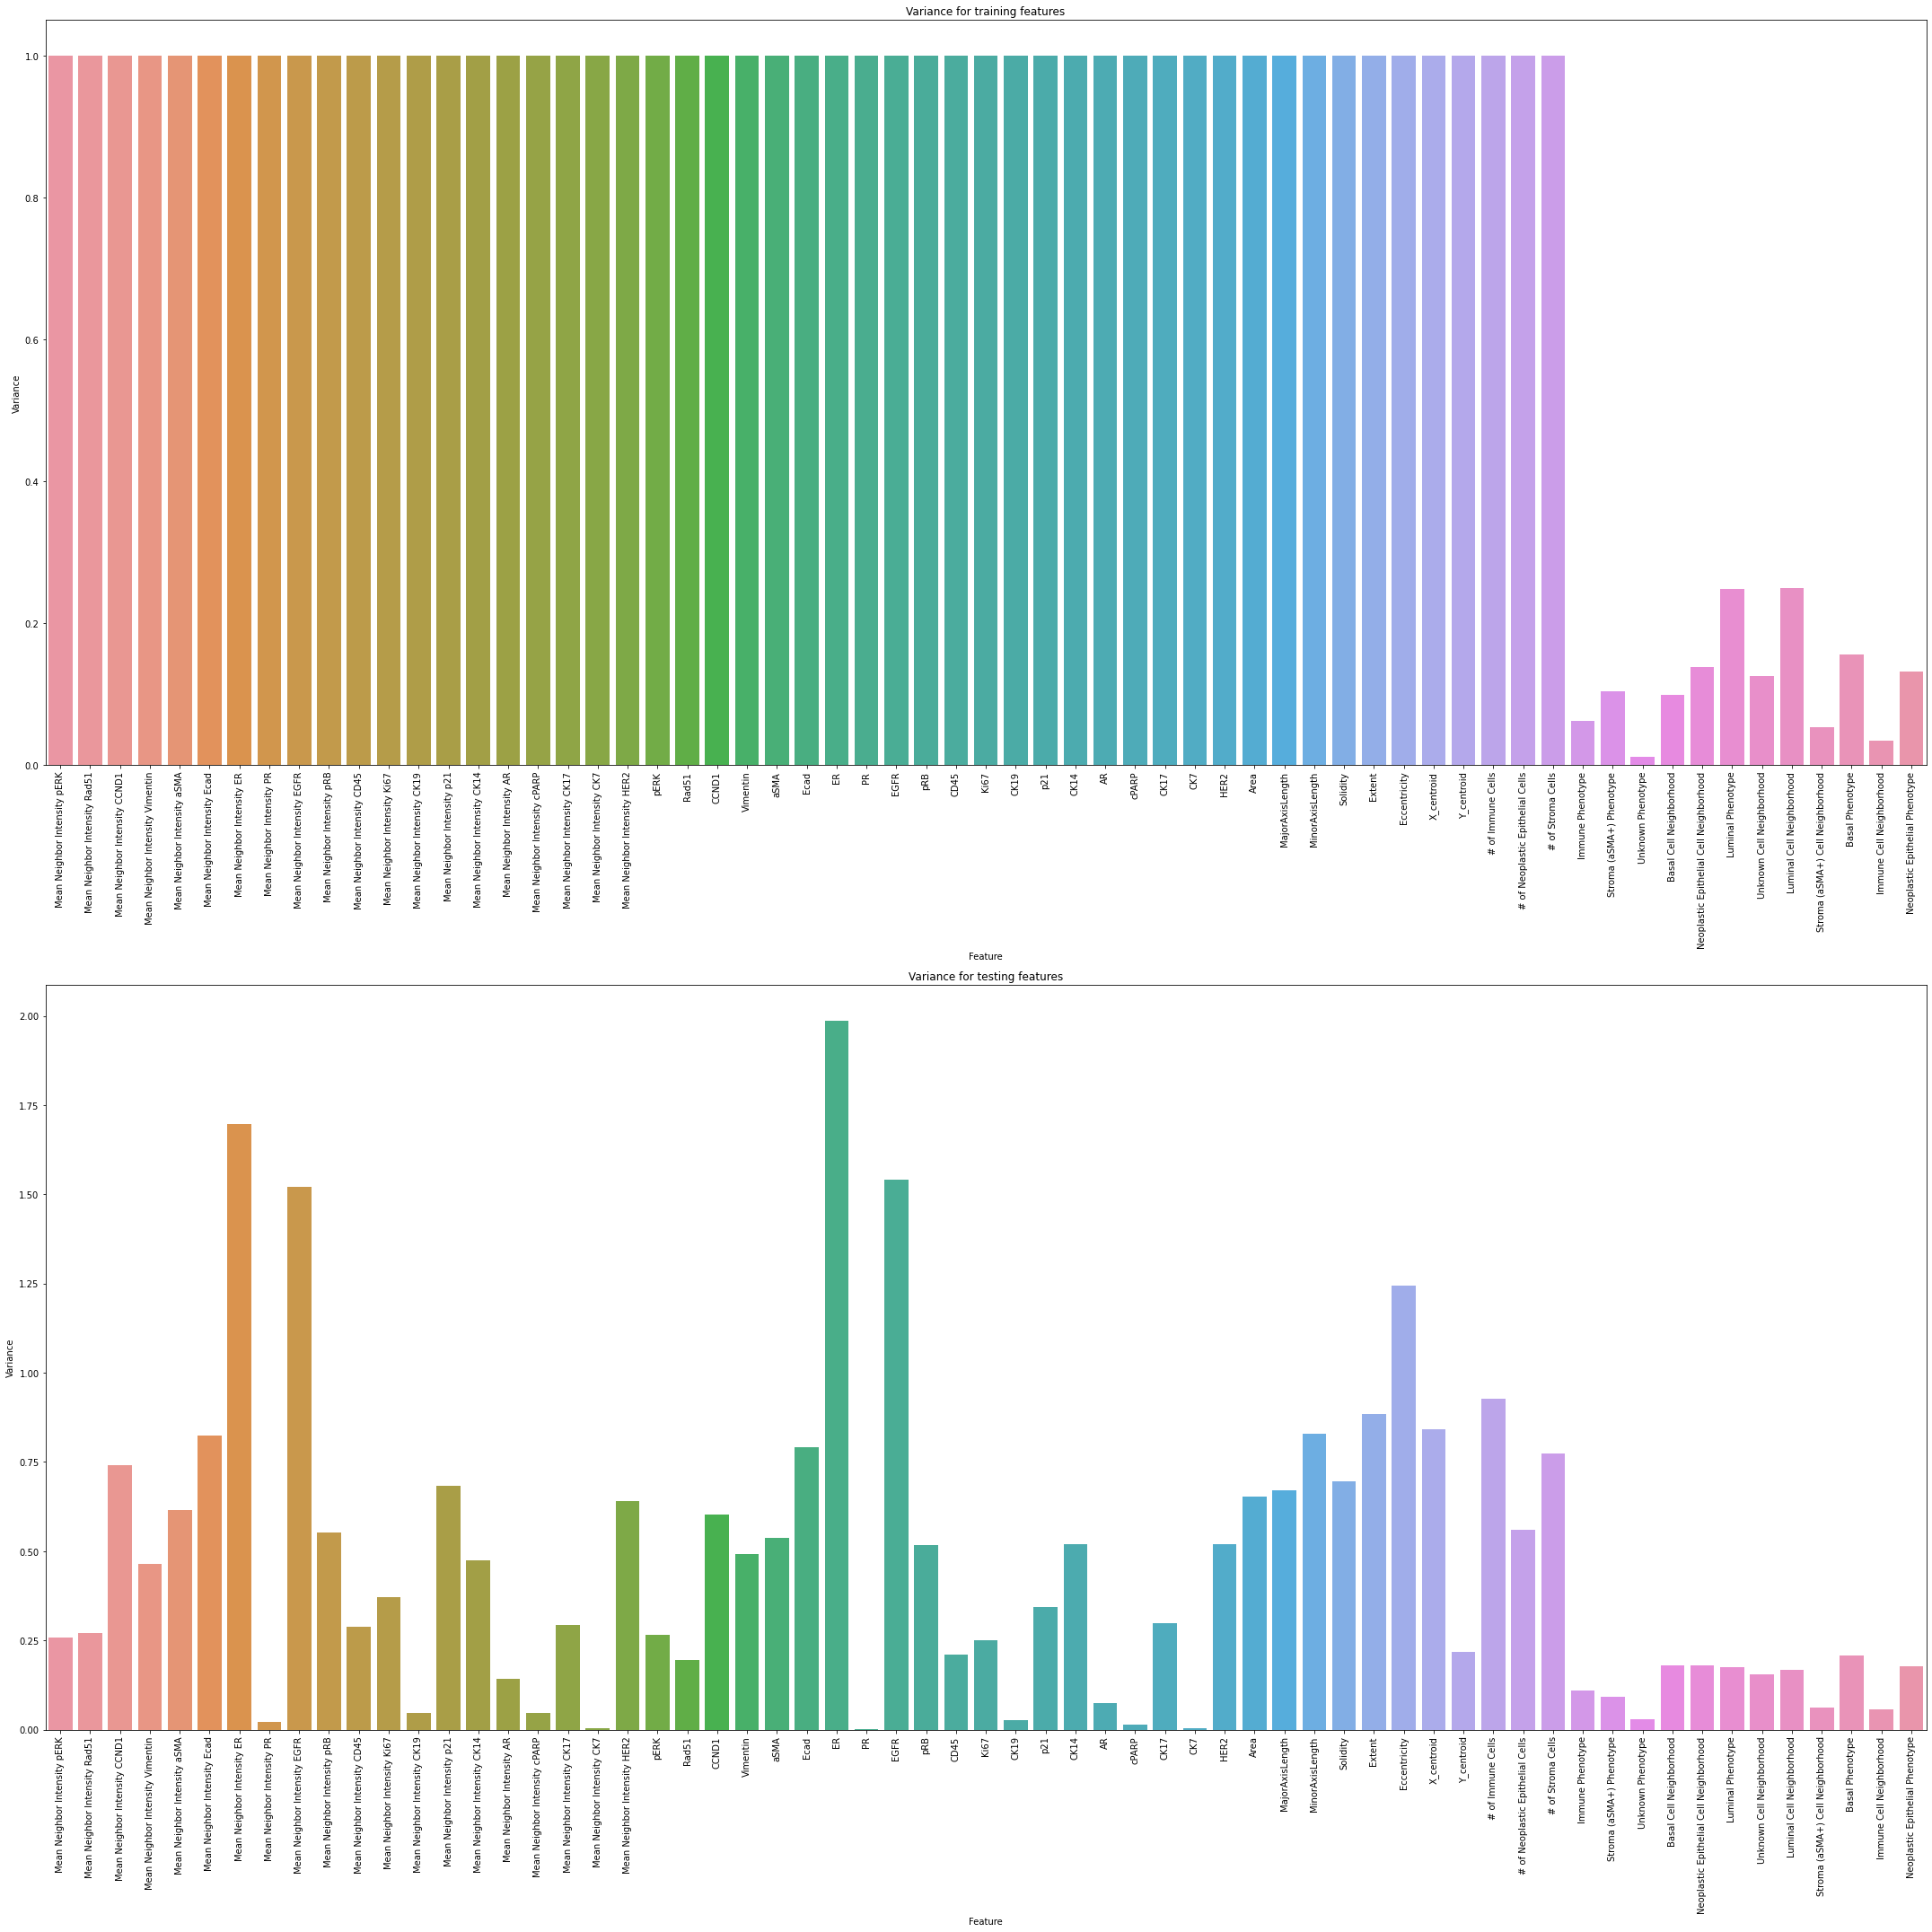

In [413]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(30,30))
sns.barplot(x="Feature", y="Variance", data=train_var_subset, ax=ax1)
sns.barplot(x="Feature", y="Variance", data=test_var_subset, ax=ax2)
for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
ax1.set_title("Variance for training features")
ax2.set_title("Variance for testing features")

plt.tight_layout()
plt.savefig(f'data/{case_to_evaluate}/distance_based/{case_percentage}/{case_normalization}/standard_deviation.png', dpi=fig.dpi,bbox_inches='tight',facecolor='w')

# Examine data

## Check train data


In [414]:
combined_train_cells.describe()

,Mean Neighbor Intensity pERK,Mean Neighbor Intensity Rad51,Mean Neighbor Intensity CCND1,Mean Neighbor Intensity Vimentin,Mean Neighbor Intensity aSMA,Mean Neighbor Intensity Ecad,Mean Neighbor Intensity ER,Mean Neighbor Intensity PR,Mean Neighbor Intensity EGFR,Mean Neighbor Intensity pRB,...,Basal Cell Neighborhood,Neoplastic Epithelial Cell Neighborhood,Luminal Phenotype,Unknown Cell Neighborhood,Luminal Cell Neighborhood,Stroma (aSMA+) Cell Neighborhood,Basal Phenotype,Immune Cell Neighborhood,Neoplastic Epithelial Phenotype,Radius
count,7.219740e+05,7.219740e+05,7.219740e+05,7.219740e+05,7.219740e+05,7.219740e+05,7.219740e+05,7.219740e+05,7.219740e+05,7.219740e+05,...,721974.000000,721974.000000,721974.000000,721974.000000,721974.000000,721974.000000,721974.000000,721974.000000,721974.000000,721974.000000
mean,-7.589893e-17,3.659624e-17,-1.074710e-17,4.409067e-18,1.574667e-19,-1.181000e-18,1.508531e-16,7.983560e-17,2.421837e-16,-4.598027e-17,...,0.110748,0.165593,0.457105,0.147249,0.485282,0.055638,0.191857,0.035490,0.155573,47.500000
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,0.313820,0.371715,0.498157,0.354354,0.499784,0.229221,0.393762,0.185015,0.362451,31.589841
min,-2.489172e+00,-3.405892e+00,-3.484052e+00,-2.152808e+00,-1.604644e+00,-2.562109e+00,-1.794828e+00,-8.163657e-01,-4.203622e+00,-3.003808e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,-4.408156e-01,-4.734601e-01,-5.051366e-01,-5.826040e-01,-4.955883e-01,-4.372794e-01,-5.633625e-01,-6.165082e-01,-4.887146e-01,-4.770146e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,-2.903524e-01,-2.453217e-01,-1.559823e-01,-3.119316e-01,-2.632757e-01,-4.821973e-02,-2.661018e-01,-3.586094e-01,2.186880e-02,-2.175567e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
75%,1.645037e-01,4.790702e-01,5.681418e-01,2.940629e-01,1.947150e-01,6.300612e-01,4.159008e-01,8.994852e-02,5.968787e-01,4.867974e-01,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,75.000000
max,2.014426e+01,1.222851e+01,1.084953e+01,2.945286e+01,4.230529e+01,8.645164e+00,1.554455e+01,1.723392e+01,6.042598e+00,2.718875e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


## Check replaced data

Mean intensities with 0s refer to cells without neighbors

In [415]:
combined_replaced_cells.describe()

,Mean Neighbor Intensity pERK,Mean Neighbor Intensity Rad51,Mean Neighbor Intensity CCND1,Mean Neighbor Intensity Vimentin,Mean Neighbor Intensity aSMA,Mean Neighbor Intensity Ecad,Mean Neighbor Intensity ER,Mean Neighbor Intensity PR,Mean Neighbor Intensity EGFR,Mean Neighbor Intensity pRB,...,Basal Cell Neighborhood,Neoplastic Epithelial Cell Neighborhood,Luminal Phenotype,Unknown Cell Neighborhood,Luminal Cell Neighborhood,Stroma (aSMA+) Cell Neighborhood,Basal Phenotype,Immune Cell Neighborhood,Neoplastic Epithelial Phenotype,Radius
count,118434.000000,118434.000000,118434.000000,118434.000000,118434.000000,118434.000000,118434.000000,118434.000000,118434.000000,118434.000000,...,118434.000000,118434.000000,118434.000000,118434.000000,118434.000000,118434.000000,118434.000000,118434.000000,118434.000000,118434.000000
mean,-0.155346,-0.997888,-0.389106,-0.140904,-0.148340,-0.545336,-0.245847,-0.568900,0.045706,-0.457791,...,0.234358,0.233379,0.224581,0.190275,0.214668,0.066155,0.291251,0.061165,0.228735,47.500000
std,0.509027,0.519856,0.861257,0.682097,0.785004,0.908157,1.303154,0.144462,1.233561,0.743178,...,0.423599,0.422983,0.417308,0.392520,0.410594,0.248554,0.454341,0.239633,0.420020,31.589952
min,-2.489172,-3.405892,-3.484052,-2.152808,-1.604644,-2.562109,-1.794828,-0.816366,-4.203622,-3.003808,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,-0.435468,-1.308602,-0.952938,-0.547797,-0.561582,-1.297244,-1.036969,-0.658069,-0.488715,-0.703940,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,-0.210961,-1.068544,-0.447159,-0.311932,-0.272346,-0.437279,-0.425391,-0.624522,0.301477,-0.402289,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
75%,0.047900,-0.669251,0.077822,0.127171,-0.033283,0.052464,0.064196,-0.564371,0.837208,-0.156298,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,75.000000
max,11.590823,11.164552,8.592613,14.114142,27.026936,6.134512,12.863747,0.644658,5.958374,19.261507,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [416]:
combined_replaced_cells[['# of Immune Cells', '# of Neoplastic Epithelial Cells',
       '# of Stroma Cells']].describe()

,# of Immune Cells,# of Neoplastic Epithelial Cells,# of Stroma Cells
count,118434.000000,118434.000000,118434.000000
mean,0.174135,-0.633277,-0.173168
std,0.963056,0.747442,0.879217
min,-0.474132,-2.211565,-0.958912
25%,-0.319850,-1.161405,-0.702117
50%,-0.103741,-0.514491,-0.436227
75%,0.308180,-0.302394,-0.137262
max,21.543097,7.216830,12.641555


In [447]:
combined_replaced_cells.head()

,Mean Neighbor Intensity pERK,Mean Neighbor Intensity Rad51,Mean Neighbor Intensity CCND1,Mean Neighbor Intensity Vimentin,Mean Neighbor Intensity aSMA,Mean Neighbor Intensity Ecad,Mean Neighbor Intensity ER,Mean Neighbor Intensity PR,Mean Neighbor Intensity EGFR,Mean Neighbor Intensity pRB,...,Basal Cell Neighborhood,Neoplastic Epithelial Cell Neighborhood,Luminal Phenotype,Unknown Cell Neighborhood,Luminal Cell Neighborhood,Stroma (aSMA+) Cell Neighborhood,Basal Phenotype,Immune Cell Neighborhood,Neoplastic Epithelial Phenotype,Radius
0,-0.435468,-0.46495,-0.447159,-0.311932,-0.263276,-0.437279,-0.425391,-0.283153,-0.488715,-0.402289,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10
1,-0.435468,-0.46495,-0.447159,-0.311932,-0.263276,-0.437279,-0.425391,-0.283153,-0.488715,-0.402289,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10
2,-0.435468,-0.46495,-0.447159,-0.311932,-0.263276,-0.437279,-0.425391,-0.283153,-0.488715,-0.402289,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,10
3,-0.435468,-0.46495,-0.447159,-0.311932,-0.263276,-0.437279,-0.425391,-0.283153,-0.488715,-0.402289,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10
4,-0.435468,-0.46495,-0.447159,-0.311932,-0.263276,-0.437279,-0.425391,-0.283153,-0.488715,-0.402289,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10


In [418]:
number_of_cells = combined_replaced_cells[["# of Neoplastic Epithelial Cells", "# of Stroma Cells", "# of Immune Cells"]]
number_of_cells.value_counts()

# of Neoplastic Epithelial Cells  # of Stroma Cells  # of Immune Cells
-0.425498                         -0.137262          -0.103741            17522
-0.991643                         -0.436227          -0.271160             3072
-0.514491                         -0.436227          -0.271160             2933
-0.037338                         -0.436227          -0.271160             2431
-1.468796                         -0.436227          -0.271160             2278
                                                                          ...  
-1.758385                          0.340346           0.628857                1
                                                     -0.382216                1
                                                     -0.474132                1
                                   0.232074           3.110580                1
-0.972873                         -0.958912           0.261194                1
Length: 20682, dtype: int64

In [419]:
combined_replaced_cells.isna().sum().sum()

592170

In [420]:
combined_un_normalized_cells["# of Neighbors"] = combined_un_normalized_cells["# of Immune Cells"] + combined_un_normalized_cells["# of Neoplastic Epithelial Cells"] + combined_un_normalized_cells["# of Stroma Cells"]
combined_un_normalized_cells["# of Neighbors"].value_counts()

0      20479
1       7029
2       6625
3       6385
4       5502
       ...  
125        4
118        4
123        3
128        2
129        1
Name: # of Neighbors, Length: 130, dtype: int64

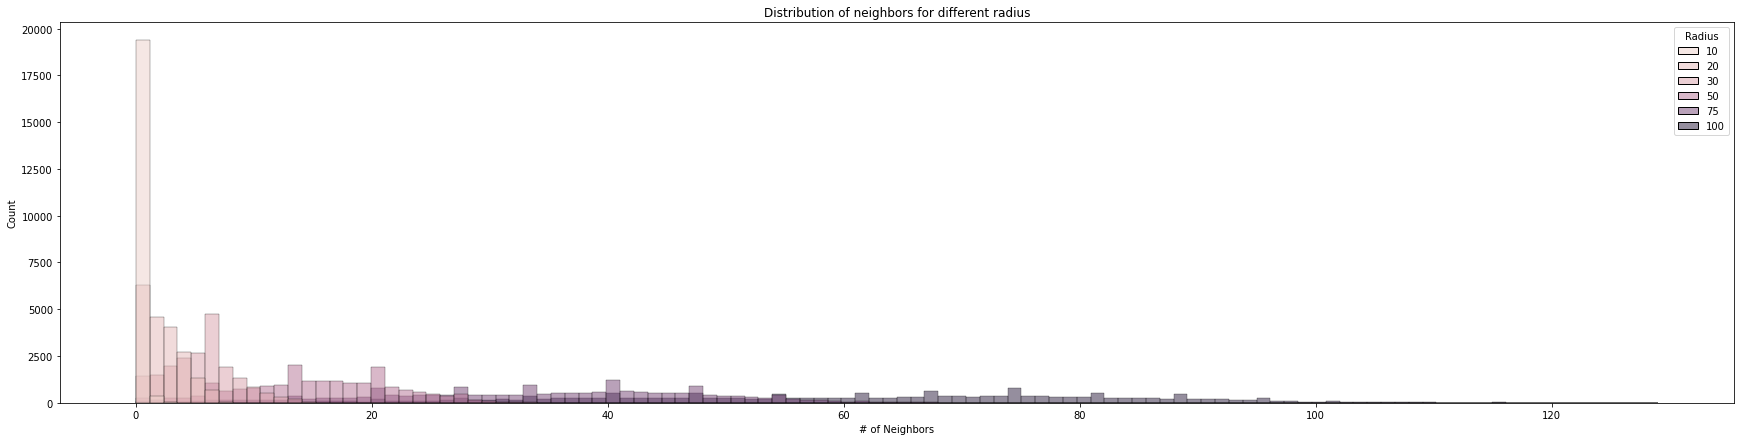

In [421]:
fig = plt.figure()
ax = sns.histplot(data=combined_un_normalized_cells, x="# of Neighbors", hue="Radius")
#plt.xticks(combined_replaced_cells["# of Neighbors"].unique())
fig.set_size_inches(30,7)
plt.title("Distribution of neighbors for different radius")
plt.show()

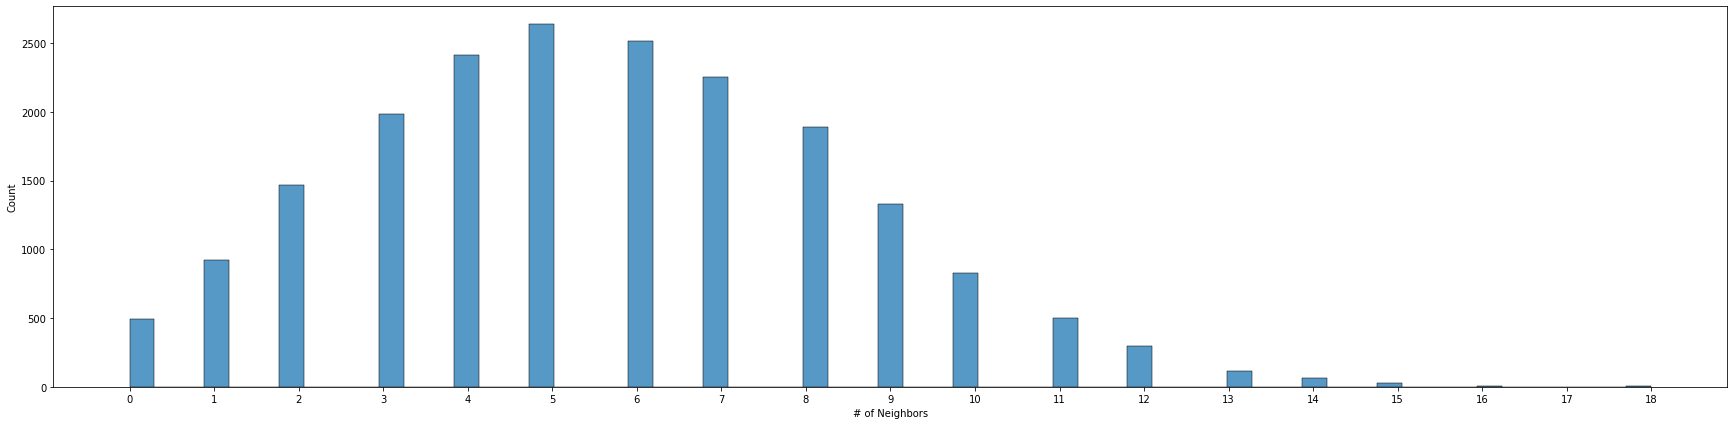

In [422]:
fig = plt.figure()
ax = sns.histplot(data=combined_un_normalized_cells[combined_un_normalized_cells["Radius"] == 30], x="# of Neighbors")
plt.xticks(combined_un_normalized_cells[combined_un_normalized_cells["Radius"] == 30]["# of Neighbors"].unique())
fig.set_size_inches(30,7)
plt.show()

## Count NAs per row

20% replaced data should yield a mean of 5 replaced features

In [423]:
combined_replaced_cells.isna().sum(axis=1).mean()

5.0

## Test Data

In [424]:
# Available Distances

combined_test_cells["Radius"].unique()

array([ 10,  20,  30,  50,  75, 100])

# Index Replacments

In [425]:
index_replacements = pd.read_csv(f"data/{case_to_evaluate}/index_replacements.csv")
index_replacements = index_replacements.T.to_dict()
print(len(index_replacements))


19739


# Load imputed features

In [426]:
features = pd.read_csv(f"data/{case_to_evaluate}/features_to_impute.csv")
features = features["0"].to_list()
features

['pERK',
 'Rad51',
 'CCND1',
 'Vimentin',
 'aSMA',
 'Ecad',
 'ER',
 'PR',
 'EGFR',
 'pRB',
 'CD45',
 'Ki67',
 'CK19',
 'p21',
 'CK14',
 'AR',
 'cPARP',
 'CK17',
 'CK7',
 'HER2',
 'Area',
 'MajorAxisLength',
 'MinorAxisLength',
 'Solidity',
 'Extent',
 'Eccentricity']

# R2 score calculation

In [427]:
from typing import List, Dict
from sklearn.metrics import r2_score

def evaluate_performance(features: List, index_replacements: Dict, test_data: pd.DataFrame,
                             imputed_data: pd.DataFrame):
        """
        Evaluates the performance per feature
        @param features:
        @param index_replacements:
        @param test_data:
        @param imputed_data:
        @return: Returns a dataframe with r2 scores for performance evaluation
        """
        score_data: List = []

        for feature in features:
            if "X_centroid" in feature or "Y_centroid" in feature or "Origin" in feature:
                continue

            # Store all cell indexes, to be able to select the correct cells later for r2 comparison
            cell_indexes_to_compare: list = []
            for key, replaced_features in index_replacements.items():
                key = int(key)
                replaced_features = list(replaced_features.values())
                
                if feature in replaced_features:
                    cell_indexes_to_compare.append(key)
           
            score = r2_score(test_data[feature].loc[cell_indexes_to_compare],
                                  imputed_data[feature].loc[cell_indexes_to_compare])
                    
            score_data.append({
                "Feature": feature,
                "Score": score if score >= 0 else 0
            })

        return pd.DataFrame().from_records(score_data)

In [428]:
distance = 30

selected_test_cells = combined_test_cells[combined_test_cells["Radius"] == distance].reset_index(drop=True)
selected_imputed_cells = combined_imputed_cells[combined_imputed_cells["Radius"] == distance].reset_index(drop=True)

#selected_imputed_cells.filter(regex=("Mean *"))
selected_imputed_cells.filter(features)
#selected_test_cells.filter(features)

,pERK,Rad51,CCND1,Vimentin,aSMA,Ecad,ER,PR,EGFR,pRB,...,cPARP,CK17,CK7,HER2,Area,MajorAxisLength,MinorAxisLength,Solidity,Extent,Eccentricity
0,-0.882427,-1.489173,-1.090986,-0.559549,0.207134,-1.289539,-1.364388,-0.521901,-1.252869,-0.679802,...,-0.507030,-0.540631,-0.168822,-0.400682,-0.723303,-0.668321,-0.685647,-0.209900,0.892000,0.160231
1,-0.864492,-1.626709,-1.330189,-0.547719,-0.570832,-1.337733,-1.383180,-0.527755,-1.787770,-0.796308,...,-0.512868,-0.559835,-0.162947,-0.473980,-0.804038,-1.075664,-0.585422,0.518495,1.104433,-1.499632
2,-1.419325,-2.006280,-1.575898,-0.736972,-0.602491,-1.353069,-1.262475,-0.535020,-2.095939,-0.868139,...,-0.117569,-0.540925,-0.165627,-0.451881,0.360855,0.593561,0.068776,0.865235,1.698486,0.775852
3,-1.415455,-1.948332,-1.579182,-0.728195,-0.607827,-1.354973,-1.385255,-0.534776,-2.092388,-0.833724,...,-0.507477,-0.543752,-0.164089,-0.476446,-0.700235,-1.162294,-0.254855,0.313485,1.058912,-2.116847
4,-1.392181,-1.960398,-1.570305,-0.697474,-0.600727,-1.344601,-1.321743,-0.532200,-2.062776,-0.855788,...,-0.508934,-0.585253,-0.163558,-0.487785,-0.261959,-0.476958,-0.023985,0.715788,0.968303,-0.333569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19734,-1.176554,-2.005249,-1.408212,-0.716763,-0.545297,-1.350395,-1.384034,-0.534535,-2.132963,-0.882188,...,-0.508212,-0.619379,-0.166976,-0.427781,-0.757903,-1.166534,-0.438175,0.579101,0.641633,-1.398261
19735,-1.405615,-2.011900,-1.585507,-0.733330,-0.610138,-1.351945,-1.277011,-0.534604,-2.109223,-0.868074,...,-0.510569,-0.569633,-0.162927,-0.457439,2.258132,3.079283,1.047399,-0.248257,-1.026498,1.682442
19736,-1.340589,-1.963759,-1.581041,-0.715634,-0.612850,-1.362864,-1.349392,-0.533996,-2.120541,-0.880183,...,-0.507934,-0.580978,-0.165819,-0.518566,-0.515698,-0.867567,-0.064229,0.392588,-0.395601,-1.366004
19737,-1.337649,-1.960148,-1.582807,-0.718603,-0.611408,-1.324320,-1.106670,-0.534982,-2.132161,-0.885198,...,-0.728152,-0.611207,-0.165467,-0.488015,0.257053,-0.169288,0.296018,0.160919,0.431007,-0.312432


In [429]:
combined_r2_scores_data = []
for radius in combined_test_cells["Radius"].unique():
    selected_test_cells = combined_test_cells[combined_test_cells["Radius"] == radius].reset_index(drop=True)
    selected_imputed_cells = combined_imputed_cells[combined_imputed_cells["Radius"] == radius].reset_index(drop=True)
    r2_scores = evaluate_performance(features, index_replacements, selected_test_cells, selected_imputed_cells)
    r2_scores["Radius"] = radius
    combined_r2_scores_data.append(r2_scores)
    
combined_r2_scores = pd.concat(combined_r2_scores_data)
combined_r2_scores.to_csv(f"data/{case_to_evaluate}/distance_based/{case_percentage}/{case_normalization}/combined_r2_scores.csv", index=False)
combined_r2_scores

,Feature,Score,Radius
0,pERK,0.000000,10
1,Rad51,0.000000,10
2,CCND1,0.059029,10
3,Vimentin,0.000000,10
4,aSMA,0.154292,10
...,...,...,...
21,MajorAxisLength,0.655901,100
22,MinorAxisLength,0.685000,100
23,Solidity,0.132177,100
24,Extent,0.114160,100


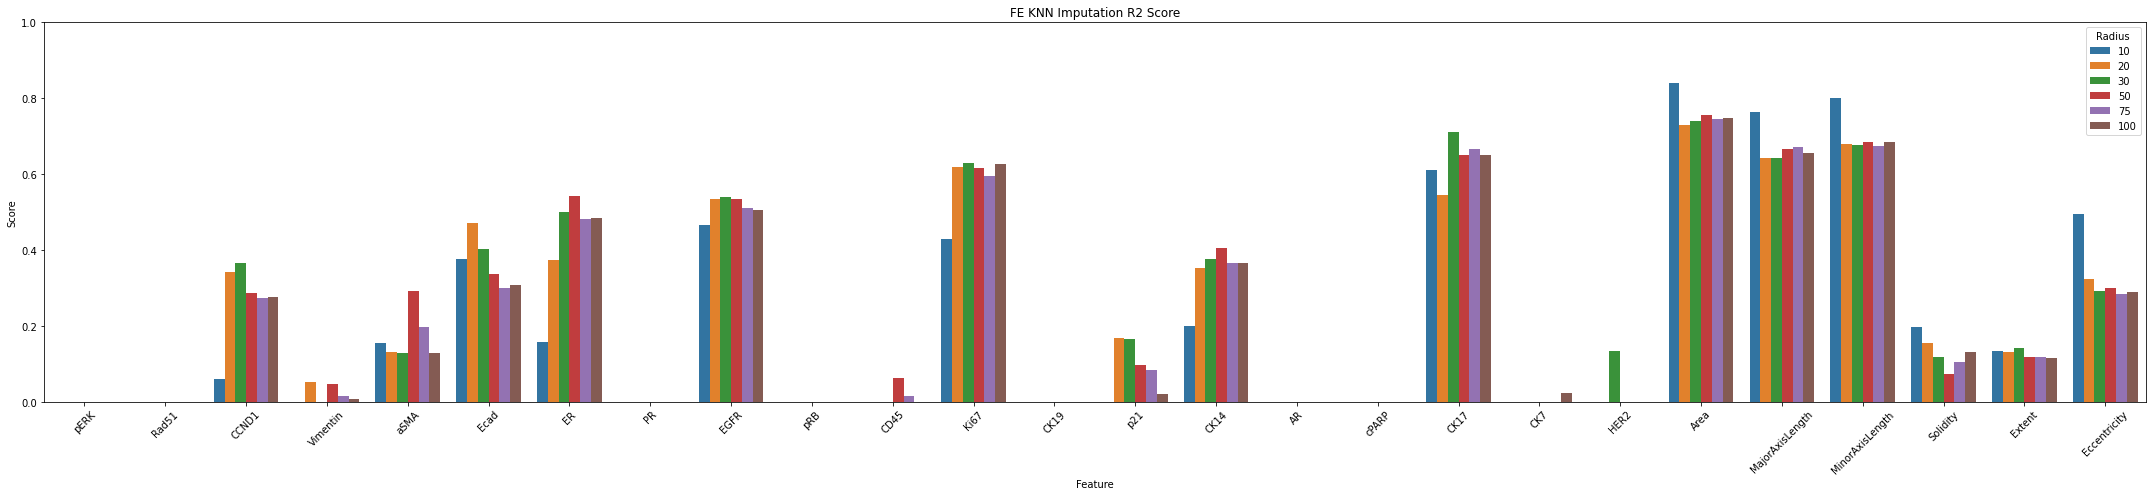

In [430]:
fig = plt.figure()
sns.barplot(x="Feature", y="Score",hue="Radius", data=combined_r2_scores)
for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
fig.set_size_inches(30,7)
plt.title("FE KNN Imputation R2 Score") 
plt.tight_layout()
plt.ylim(0,1)
plt.show()

### Correlation between marker performance and mean and std of feature

In [431]:
test_mean_set = combined_test_cells[combined_test_cells["Radius"] == 10]
test_mean_set = pd.DataFrame(test_mean_set[features].copy().mean())
test_mean_set.reset_index(inplace=True)
test_mean_set.rename(columns={"index": "Feature", 0 : "Mean"}, inplace=True)


test_var_set = combined_test_cells[combined_test_cells["Radius"] == 10]
test_var_set = pd.DataFrame(test_var_set[features].copy().var())
test_var_set.reset_index(inplace=True)
test_var_set.rename(columns={"index": "Feature", 0 : "Variance"}, inplace=True)
temp_scores = combined_r2_scores[combined_r2_scores["Radius"] == 10][["Feature", "Score"]]



mean_var_scores = pd.concat([test_mean_set, test_var_set, temp_scores], axis=1)
mean_var_scores.drop(columns=["Feature"], inplace=True)
mean_var_scores["Feature"] = temp_scores["Feature"].values
mean_var_scores_corr = mean_var_scores.corr()
mean_var_scores_corr

,Mean,Variance,Score
Mean,1.000000,0.428601,0.358159
Variance,0.428601,1.000000,0.396299
Score,0.358159,0.396299,1.000000


<Figure size 432x288 with 0 Axes>

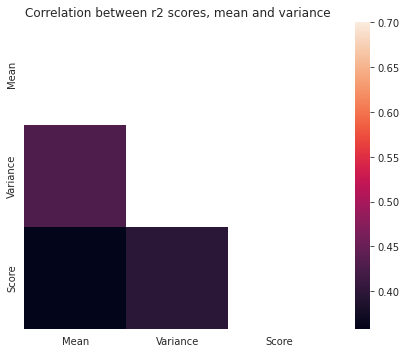

In [432]:
fig = plt.figure()
mask = np.zeros_like(mean_var_scores_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(mean_var_scores_corr, mask=mask, vmax=.7, square=True)

plt.title("Correlation between r2 scores, mean and variance")
plt.tight_layout()
plt.savefig(f'data/{case_to_evaluate}/distance_based/{case_percentage}/{case_normalization}/mean_vae_scores_correlation.png', dpi=fig.dpi,bbox_inches='tight',facecolor='w')

# Compare standardized data with normalized data

In [439]:
combined_imputed_cells_normalized = pd.read_csv(f"data/{case_to_evaluate}/distance_based/{case_percentage}/N/combined_imputed_cells.csv")
combined_test_cells_normalized = pd.read_csv(f"data/{case_to_evaluate}/distance_based/{case_percentage}/N/combined_test_cells.csv")



In [440]:
combined_normalized_r2_scores_data = []
for radius in combined_test_cells["Radius"].unique():
    selected_test_cells = combined_test_cells_normalized[combined_test_cells["Radius"] == radius].reset_index(drop=True)
    selected_imputed_cells = combined_imputed_cells_normalized[combined_imputed_cells["Radius"] == radius].reset_index(drop=True)
    r2_scores = evaluate_performance(features, index_replacements, selected_test_cells, selected_imputed_cells)
    r2_scores["Radius"] = radius
    combined_normalized_r2_scores_data.append(r2_scores)
    
combined_normalized_r2_scores = pd.concat(combined_normalized_r2_scores_data)
combined_normalized_r2_scores["Scaling"] = "N"
#combined_normalized_r2_scores.to_csv(f"data/{case_to_evaluate}/distance_based/{case_percentage}/{case_normalization}/combined_r2_scores.csv", index=False)

In [441]:
combined_imputed_cells_standardized = pd.read_csv(f"data/{case_to_evaluate}/distance_based/{case_percentage}/S/combined_imputed_cells.csv")
combined_test_cells_standardized = pd.read_csv(f"data/{case_to_evaluate}/distance_based/{case_percentage}/S/combined_test_cells.csv")

In [442]:
combined_standardized_r2_scores_data = []
for radius in combined_test_cells["Radius"].unique():
    selected_test_cells = combined_test_cells_standardized[combined_test_cells["Radius"] == radius].reset_index(drop=True)
    selected_imputed_cells = combined_imputed_cells_standardized[combined_imputed_cells["Radius"] == radius].reset_index(drop=True)
    r2_scores = evaluate_performance(features, index_replacements, selected_test_cells, selected_imputed_cells)
    r2_scores["Radius"] = radius
    combined_standardized_r2_scores_data.append(r2_scores)
    
combined_standardized_r2_scores = pd.concat(combined_standardized_r2_scores_data)
combined_standardized_r2_scores["Scaling"] = "S"
#combined_standardized_r2_scores.to_csv(f"data/{case_to_evaluate}/distance_based/{case_percentage}/{case_normalization}/combined_r2_scores.csv", index=False)

In [443]:
scaled_r2_scores = pd.concat([combined_normalized_r2_scores, combined_standardized_r2_scores])
scaled_r2_scores

,Feature,Score,Radius,Scaling
0,pERK,0.000000,10,N
1,Rad51,0.000000,10,N
2,CCND1,0.000000,10,N
3,Vimentin,0.000000,10,N
4,aSMA,0.093715,10,N
...,...,...,...,...
21,MajorAxisLength,0.655901,100,S
22,MinorAxisLength,0.685000,100,S
23,Solidity,0.132177,100,S
24,Extent,0.114160,100,S


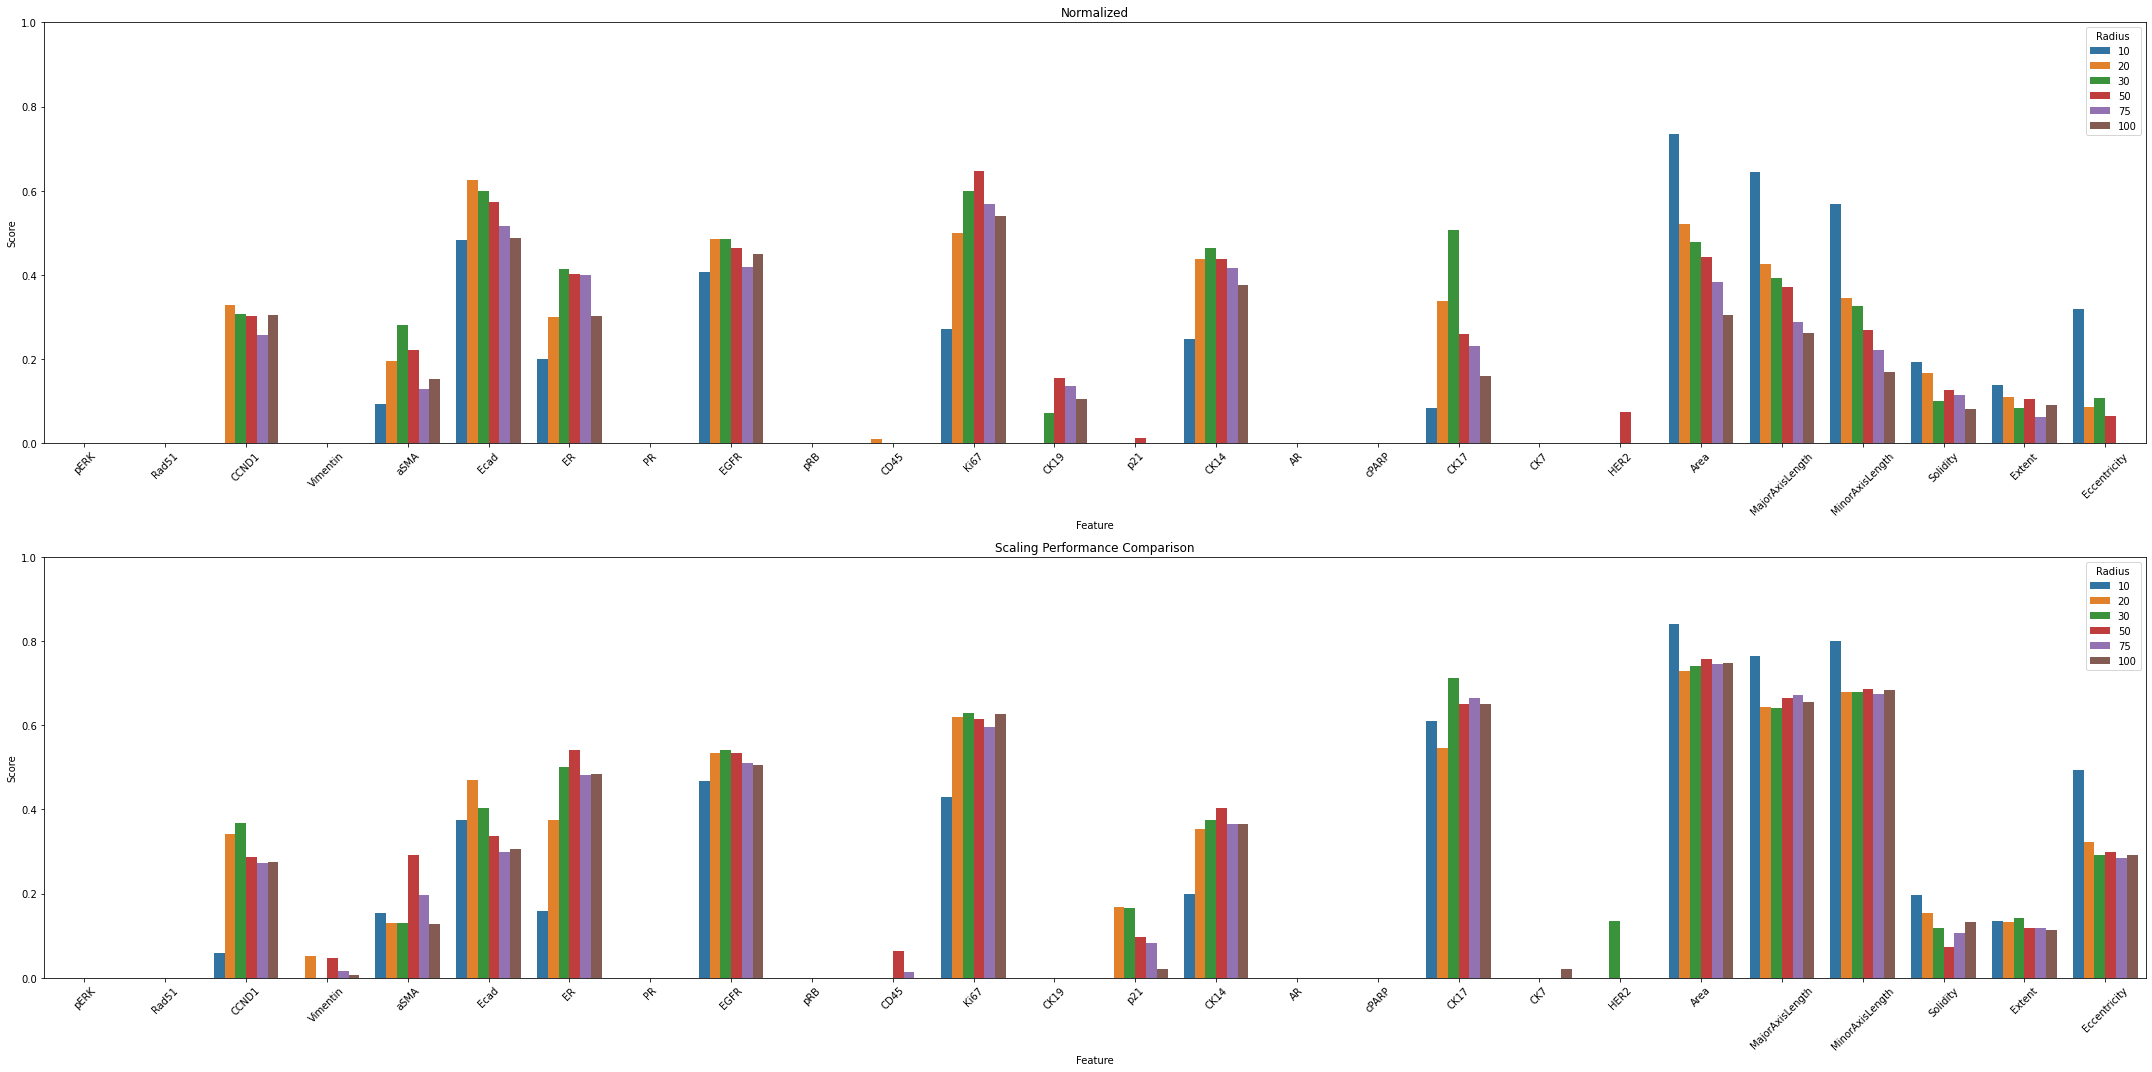

In [445]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(30,15))
sns.barplot(x="Feature", y="Score",hue="Radius", data=combined_normalized_r2_scores, ax=ax1)
sns.barplot(x="Feature", y="Score",hue="Radius", data=combined_standardized_r2_scores, ax=ax2)
for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        
ax1.set_title("Normalized")
ax2.set_title("Standardized")
plt.title("Scaling Performance Comparison") 
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
plt.tight_layout()

plt.savefig(f'data/{case_to_evaluate}/distance_based/{case_percentage}/scaled_r2_scores.png', dpi=fig.dpi,bbox_inches='tight',facecolor='w')